<a href="https://colab.research.google.com/github/baborok/Dissolved-gas-analysis/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BE%D0%BF%D0%BE%D1%80%D0%BD%D1%8B%D1%85_%D0%B2%D0%B5%D0%BA%D1%82%D0%BE%D1%80%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Проведем классифкацию по результатам хроматографического анализа расторвенных газов

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


Считываем данные

In [ ]:
bankdata = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/test.csv')

In [ ]:
bankdata.shape

(200, 7)

Таблица содержит показания газов и классифкацию повреждения 

In [ ]:
bankdata.head()

,H2,CH4,C2H2,C2H4,C2H6,CO,Fault Type
0,4566,671,683643,434322,45482,2001,High intensity discharge
1,2323,782,545454,342233,4343,4545,High intensity discharge
2,2118,844,540711,449264,4443,4535,High intensity discharge
3,2285,706,546779,435718,4303,4235,High intensity discharge
4,2238,826,537988,335279,4008,4472,High intensity discharge


In [ ]:
X = bankdata.drop('Fault Type', axis=1)
y = bankdata['Fault Type']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = svclassifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 8  0  0  0]
 [ 0  6  0  0]
 [ 0  1 20  0]
 [ 0  0  0  5]]
                          precision    recall  f1-score   support

High intensity discharge       1.00      1.00      1.00         8
 Low intensity discharge       0.86      1.00      0.92         6
                No fault       1.00      0.95      0.98        21
           Thermal fault       1.00      1.00      1.00         5

                accuracy                           0.97        40
               macro avg       0.96      0.99      0.97        40
            weighted avg       0.98      0.97      0.98        40



**Реализация SVM ядра с Scikit-Learn**

In [ ]:
irisdata = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/test.csv')

In [ ]:
X = irisdata.drop('Fault Type', axis=1)
y = irisdata['Fault Type']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

**Полиномиальное ядро**

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)

SVC(degree=8, kernel='poly')

In [ ]:
y_pred = svclassifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 3  0  0  0]
 [ 0  0  8  0]
 [ 0  0 20  0]
 [ 0  0  9  0]]
                          precision    recall  f1-score   support

High intensity discharge       1.00      1.00      1.00         3
 Low intensity discharge       0.00      0.00      0.00         8
                No fault       0.54      1.00      0.70        20
           Thermal fault       0.00      0.00      0.00         9

                accuracy                           0.57        40
               macro avg       0.39      0.50      0.43        40
            weighted avg       0.35      0.57      0.43        40



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Гауссовский фильтр**

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = svclassifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 3  0  0  0]
 [ 0  0  8  0]
 [ 0  0 20  0]
 [ 0  0  9  0]]
                          precision    recall  f1-score   support

High intensity discharge       1.00      1.00      1.00         3
 Low intensity discharge       0.00      0.00      0.00         8
                No fault       0.54      1.00      0.70        20
           Thermal fault       0.00      0.00      0.00         9

                accuracy                           0.57        40
               macro avg       0.39      0.50      0.43        40
            weighted avg       0.35      0.57      0.43        40



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Сигмоидное ядро**

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [ ]:
y_pred = svclassifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 3  0  0  0]
 [ 0  0  8  0]
 [ 0  0 20  0]
 [ 0  0  9  0]]
                          precision    recall  f1-score   support

High intensity discharge       1.00      1.00      1.00         3
 Low intensity discharge       0.00      0.00      0.00         8
                No fault       0.54      1.00      0.70        20
           Thermal fault       0.00      0.00      0.00         9

                accuracy                           0.57        40
               macro avg       0.39      0.50      0.43        40
            weighted avg       0.35      0.57      0.43        40



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Если мы сравним производительность различных типов ядер, мы ясно увидим, что сигмоидное ядро работает хуже. Это связано с тем, что сигмоидная функция возвращает два значения, 0 и 1, поэтому она больше подходит для задач бинарной классификации. Однако в нашем случае у нас было три класса вывода.

Среди гауссовского ядра и полиномиального ядра мы можем видеть, что гауссовское ядро достигло совершенной 100% скорости предсказания, в то время как полиномиальное ядро неправильно классифицировало один экземпляр. Поэтому гауссовское ядро работало немного лучше. Однако, нет никакого твердого и быстрого правила относительно того, какое ядро работает лучше в каждом сценарии. Речь идет об испытании всех ядер и выборе ядра с наилучшими результатами в вашем тестовом наборе данных.

**К-ближайшие сосдеи**

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/podik.csv')

In [ ]:
X = df.drop('Fault Type', axis=1)
y = df['Fault Type']

In [ ]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
H2,200.0,3511.885,3323.603161,0.0,498.25,2397.5,4923.50,10000.0
CH4,200.0,1949.145,2321.353836,0.0,395.00,774.0,4223.75,6713.0
C2H2,200.0,96680.990,220616.677109,0.0,5.00,72.0,3797.25,683643.0
C2H4,200.0,65416.865,137974.211229,0.0,72.00,990.0,22416.75,449264.0
C2H6,200.0,3061.305,5716.102275,0.0,209.50,2311.0,4456.00,45482.0
CO,200.0,3216.505,4180.945910,0.0,389.00,1839.5,5147.00,40000.0


Необходимо было для данного способа заменить Fault Type с письменных описаний на 1-4, т.е. метки существущего дефекта

In [ ]:
from sklearn.model_selection import train_test_split

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

In [ ]:
len(X)       # 20640
len(X_train) # 15480
len(X_test)  # 5160

50

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Подходит только для X_train
scaler.fit(X_train)

# Масштабируйте X_train и X_test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
col_names=['H2', 'CH4', 'C2H2', 'C2H4', 'C2H6', 'CO']
scaled_df = pd.DataFrame(X_train, columns=col_names)
scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
H2,150.0,1.184238e-17,1.00335,-1.058415,-0.937503,-0.357358,0.601460,1.865701
CH4,150.0,-1.480297e-17,1.00335,-0.808816,-0.644920,-0.467302,0.217277,2.162781
C2H2,150.0,5.921189e-18,1.00335,-0.438989,-0.438954,-0.438656,-0.423328,2.717009
C2H4,150.0,-5.921189e-18,1.00335,-0.471701,-0.471432,-0.465643,-0.309307,2.801795
C2H6,150.0,1.905883e-17,1.00335,-0.527078,-0.488645,-0.157530,0.282464,7.876820
CO,150.0,-4.144833e-17,1.00335,-0.715957,-0.577043,-0.471759,0.373318,8.076056


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=5)
regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'mae: {mae}')
print(f'mse: {mse}')
print(f'rmse: {rmse}')

mae: 0.044000000000000004
mse: 0.027999999999999997
rmse: 0.1673320053068151


In [ ]:
regressor.score(X_test, y_test)

0.9766355140186916

In [ ]:
y.describe()

count    200.000000
mean       3.020000
std        1.142861
min        1.000000
25%        2.000000
50%        3.500000
75%        4.000000
max        4.000000
Name: Fault Type, dtype: float64

Поиск лучшего К для регрессии KNN

In [ ]:
error = []

# Расчет ошибки MAE для значений К между 1 и 39
for i in range(1, 40):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    mae = mean_absolute_error(y_test, pred_i)
    error.append(mae)

Text(0, 0.5, 'Mean Absolute Error')

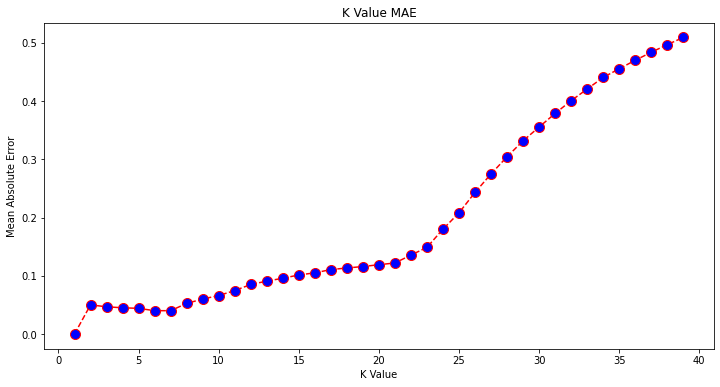

In [ ]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
         
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

Text(0, 0.5, 'Mean Absolute Error')

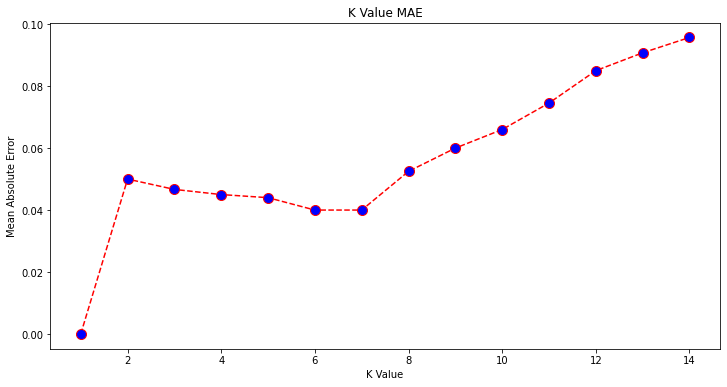

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 15), error[:14], color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

In [ ]:
import numpy as np 

print(min(error))               # 0.43631325936692505
print(np.array(error).argmin()) # 5

0.0
0


In [ ]:
knn_reg12 = KNeighborsRegressor(n_neighbors=5)
knn_reg12.fit(X_train, y_train)
y_pred12 = knn_reg12.predict(X_test)
r2 = knn_reg12.score(X_test, y_test) 

mae12 = mean_absolute_error(y_test, y_pred12)
mse12 = mean_squared_error(y_test, y_pred12)
rmse12 = mean_squared_error(y_test, y_pred12, squared=False)
print(f'r2: {r2}, \nmae: {mae12} \nmse: {mse12} \nrmse: {rmse12}')

r2: 0.9766355140186916, 
mae: 0.044000000000000004 
mse: 0.027999999999999997 
rmse: 0.1673320053068151


In [ ]:
df

,H2,CH4,C2H2,C2H4,C2H6,CO,Fault Type
0,4566,671,683643,434322,45482,2001,1
1,2323,782,545454,342233,4343,4545,1
2,2118,844,540711,449264,4443,4535,1
3,2285,706,546779,435718,4303,4235,1
4,2238,826,537988,335279,4008,4472,1
...,...,...,...,...,...,...,...
195,11,12,25,78,31,32,4
196,140,1,79,97,35,24,4
197,38,48,29,72,90,31,4
198,0,44,68,73,22,7,4


In [ ]:
y = df['Fault Type']
X = df.drop(['Fault Type', 'Fault Type'], axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
acc =  classifier.score(X_test, y_test)
print(acc) # 0.96

0.96


              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         5
           3       0.93      0.93      0.93        14
           4       0.96      0.96      0.96        23

    accuracy                           0.96        50
   macro avg       0.97      0.97      0.97        50
weighted avg       0.96      0.96      0.96        50



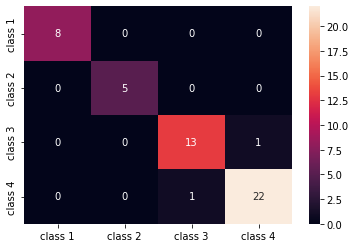

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
#импорт Seaborn's для использования тепловой карты 
import seaborn as sns

# Добавление названий классов для лучшего толкования
classes_names = ['class 1','class 2','class 3', 'class 4']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=classes_names, index = classes_names)
                  
# Тепловая карта Сиборна для лучшей визуализации матрицы путаницы
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import f1_score

f1s = []

# Расчет F1 для значений K между 1 и 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # с использованием среднего = взвешенного значения для расчета взвешенного среднего для четырех классов 
    f1s.append(f1_score(y_test, pred_i, average='weighted'))

Text(0, 0.5, 'F1 Score')

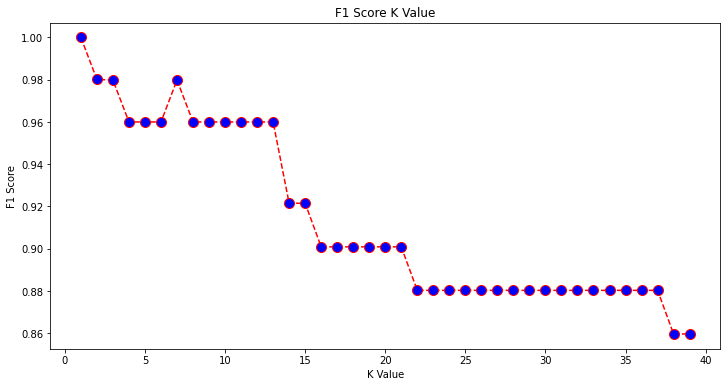

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

In [ ]:
classifier15 = KNeighborsClassifier(n_neighbors=15)
classifier15.fit(X_train, y_train)
y_pred15 = classifier15.predict(X_test)
print(classification_report(y_test, y_pred15))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       0.71      1.00      0.83         5
           3       0.93      0.93      0.93        14
           4       0.95      0.87      0.91        23

    accuracy                           0.92        50
   macro avg       0.90      0.95      0.92        50
weighted avg       0.93      0.92      0.92        50



**Реализация KNN для обнаружения выбросов с помощью Scikit-Learn**

In [ ]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors = 5)
nbrs.fit(X_train)
# Расстояния и индексы 5 соседей 
distances, indexes = nbrs.kneighbors(X_train)

In [ ]:
distances[:3], distances.shape

(array([[0.00000000e+00, 1.13538507e-01, 1.13538542e-01, 1.13538566e-01,
         1.33372447e-01],
        [0.00000000e+00, 4.61644054e-06, 9.23288107e-06, 2.18049947e-02,
         2.18050675e-02],
        [0.00000000e+00, 3.76109478e-01, 3.89514326e-01, 5.55307016e-01,
         5.87247373e-01]]), (150, 5))

In [ ]:
indexes[:3], indexes[:3].shape

(array([[  0,  15,   3,  80,  10],
        [  1, 107, 118,  45, 106],
        [  2,  48,  44, 122,  86]]), (3, 5))

Text(0, 0.5, 'Среднее расстояние')

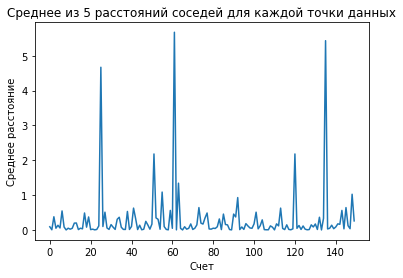

In [ ]:
dist_means = distances.mean(axis=1)
plt.plot(dist_means)
plt.title('Среднее из 5 расстояний соседей для каждой точки данных')
plt.xlabel('Cчет')
plt.ylabel('Среднее расстояние')

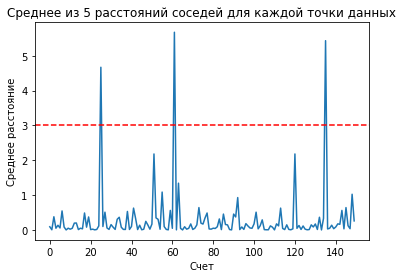

In [ ]:
dist_means = distances.mean(axis=1)
plt.plot(dist_means)
plt.title('Среднее из 5 расстояний соседей для каждой точки данных')
plt.xlabel('Cчет')
plt.ylabel('Среднее расстояние')
plt.axhline(y = 3, color = 'r', linestyle = '--')

In [ ]:
import numpy as np

# Визуально определить значения отсечения > З
outlier_index = np.where(dist_means > 3)
outlier_index

(array([ 25,  61, 135]),)

In [ ]:
outlier_values = df.iloc[outlier_index]
outlier_values

,H2,CH4,C2H2,C2H4,C2H6,CO,Fault Type
25,2400,774,609127,315114,4462,4274,1
61,9531,744,7,8,220,993,2
135,7746,2016,6945,1443,7806,3307,4
